In [1]:
## 네이버 뉴스 크롤링

from selenium import webdriver
import time
import re
import csv

keywords = ['전동킥보드', '킥라니', '전킥', '전동 킥보드', '전동 스쿠터', '전동스쿠터']
driver = webdriver.Chrome('C:/Temp/chromedriver')

for keyword in keywords:

    newsname = []
    pageNum = 1
    
    url = 'https://search.naver.com/search.naver?&where=news&query=' +str(keyword)+ '&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=53&start=1&refresh_start=0'
    driver.get(url)
    time.sleep(2)

    while True:
        newsnode = driver.find_elements_by_css_selector('.news_tit')

        for i in newsnode:
            newsname.append(i.text)
        
        next = driver.find_element_by_css_selector('.btn_next')
        pageNum += 1
    
        if pageNum > 50 :
            break
        else :
            next.click()
            time.sleep(3)
    
    with open(str(keyword) + '.csv', 'w', newline='', encoding='UTF-8') as f:
        f.write('newsname\n')
        for i in range(len(newsname)):
            f.write(newsname[i]+'\n')

In [2]:
## 워드클라우드

from selenium import webdriver
import time
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

f = open('data/전동킥보드.csv', 'r', encoding='UTF-8')
lines = f.readlines()

# title data 합치기
message = ''
for line in lines:
    message = message + re.sub('[^\w]', ' ', line) +''
#message = re.sub('자전거', '', message)
#message = re.sub('공공', '', message)

# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)

# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)

보드 : 499
공유 : 135
카카오 : 124
전동 : 64
출시 : 64
서비스 : 64
안전 : 62
아이나비 : 59
스포츠 : 59
로드 : 59
기어 : 59
팅크 : 48
웨어 : 48
연내 : 45
중장 : 40
거리 : 40
파주시 : 40
대여 : 40
탑승 : 40
개정 : 38
모빌리티 : 36
네이버 : 33
시장 : 32
진출 : 31
주차 : 29
지쿠 : 28
무단 : 28
방치 : 28
자전거 : 27
질주 : 25
단속 : 24
도로교통법 : 24
시행 : 24
최초 : 24
정비 : 24
통해 : 23
어디 : 23
바이크 : 23
탑재 : 23
이용 : 22
초점 : 22
보장 : 22
사각 : 22
지대 : 22
관련 : 22
세종시 : 22
안전교육 : 22
이론 : 22
실습 : 22
모두 : 22
피유엠피 : 22
제품 : 22
시민 : 22
보행 : 22
확보 : 22
금지 : 19
사업 : 18
횡단보도 : 18
구역 : 18
실증 : 17
주행 : 17
승자 : 17
운전 : 17
여친 : 17
남친 : 17
판단력 : 17
영상 : 17
헬멧 : 16
산업부 : 16
참여 : 16
지정 : 16
기고 : 16
경쟁 : 16
제대로 : 15
거치 : 15
제한 : 15
기반 : 15
런칭 : 15
시도 : 15
시작 : 15
하나 : 15
사고 : 9
캠페인 : 8
규제 : 8
뉴런 : 6
개인 : 5
강화 : 5
환승 : 5


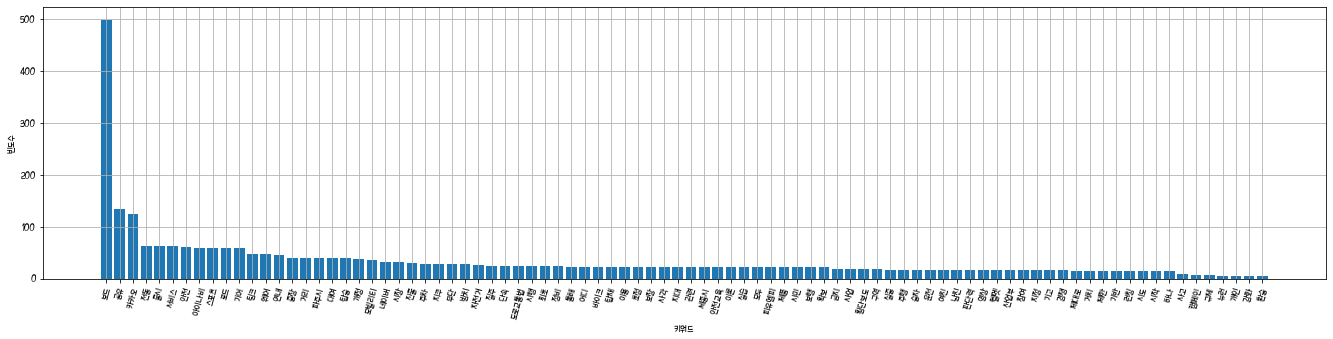

In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

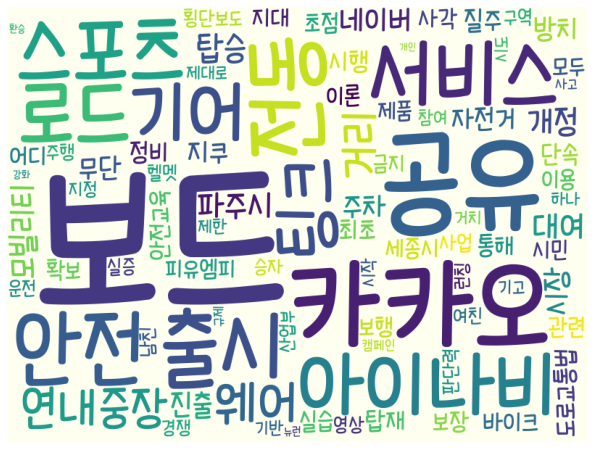

In [4]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
wc.to_file('output/wordcloud.png')